In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('all_stocks_5yr.csv')

In [3]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
dataset['date']= pd.to_datetime(dataset.date)

In [5]:
print(dataset.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [6]:
dataset.shape

(619040, 7)

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [9]:
dataset.isna().any()

date      False
open      False
high      False
low       False
close     False
volume    False
Name      False
dtype: bool

In [10]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   Name    619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [11]:
dataset.describe()

,date,open,high,low,close,volume
count,619029,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,2015-08-18 00:45:31.033280,83.023334,83.778419,82.256200,83.043305,4.321892e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207735,96.507634,97.388913,8.693671e+06


In [12]:
print(len(dataset))

619029


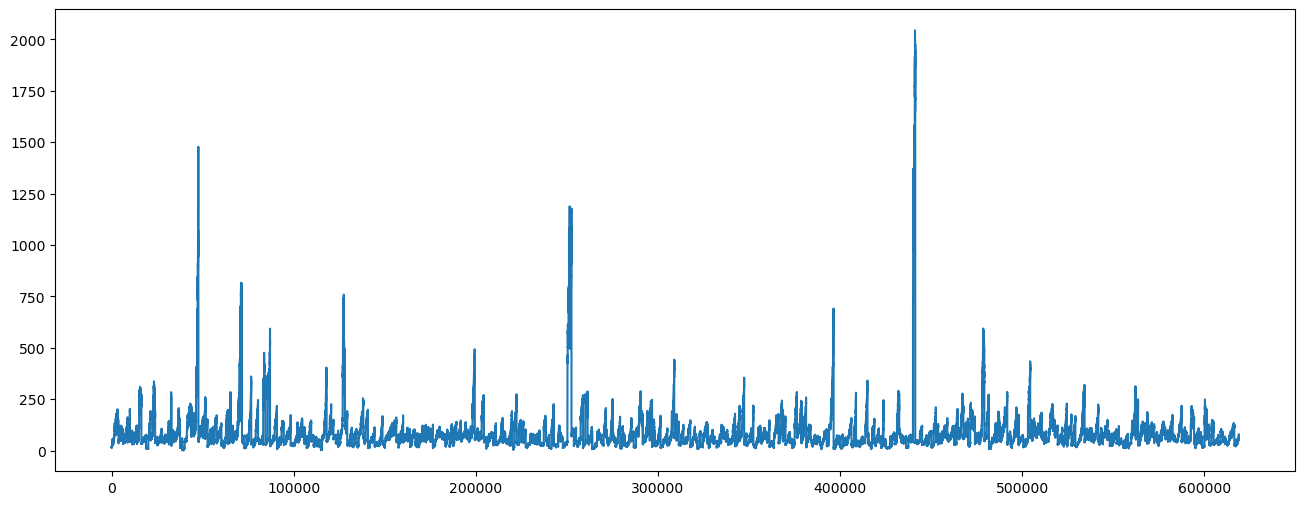

In [47]:
dataset['open'].plot(figsize=(16,6))
plt.show()

In [20]:
x= dataset[['open','high','low','volume']]
y= dataset['close']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)

In [22]:
x_train.shape

(464271, 4)

In [23]:
x_test.shape


(154758, 4)

In [24]:
x_train.isnull().sum()

open      0
high      0
low       0
volume    0
dtype: int64

In [25]:
y_train.isnull().sum()

0

In [26]:
y_train.shape

(464271,)

In [27]:
dataset.dropna(inplace=True)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()

In [29]:
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
print(regressor.coef_)

[-5.59296668e-01  7.88040082e-01  7.71543887e-01  3.12639914e-11]


In [31]:
print(regressor.intercept_)

-0.007208102076745604


In [32]:
predicted= regressor.predict(x_test)

In [33]:
print(x_test)

            open      high       low    volume
367069   48.1800   48.6100   47.8400   2298305
616460  113.4100  113.6600  112.6400    830341
296046  193.5600  193.5600  190.0000    819859
553040   81.0500   81.9300   80.5800   6439703
96249    73.7000   74.0100   71.7240   3758359
...          ...       ...       ...       ...
429918   74.2100   75.5900   73.4800   1836388
408023   62.8428   63.4285   61.9557  12990789
532200   68.7500   70.6600   68.4100   1966483
96986    67.0100   67.2800   65.9501   1878688
296758  231.9900  232.9000  225.7960   1471838

[154758 rows x 4 columns]


In [34]:
predicted.shape

(154758,)

In [35]:
dframe = pd.DataFrame(y_test,predicted)

In [36]:
dfr = pd.DataFrame({'actual':y_test,'Predicted':predicted})

In [37]:
print(dfr)

          actual   Predicted
367069   48.3800   48.263238
616460  113.3900  113.038322
296046  190.2350  190.861731
553040   81.3900   81.397129
96249    73.2300   72.433805
...          ...         ...
429918   75.5400   74.748438
408023   63.0092   62.631171
532200   69.9600   70.005437
96986    66.2600   66.417114
296758  228.1700  227.987663

[154758 rows x 2 columns]


In [38]:
 dfr.head(10)

,actual,Predicted
367069,48.380,48.263238
616460,113.390,113.038322
296046,190.235,190.861731
553040,81.390,81.397129
96249,73.230,72.433805
339170,48.220,48.332868
178157,55.430,55.623801
617613,42.340,42.143114
589539,81.150,80.153324
540711,91.680,91.636939


In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
regressor.score(x_test,y_test)

0.9999513989769865

In [41]:
import math

In [42]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error 0.338203121910802


In [43]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error 0.46804963562503654


In [44]:
graph= dfr.head(20)

In [45]:
graph.plot(kind= 'bar')

<Axes: >

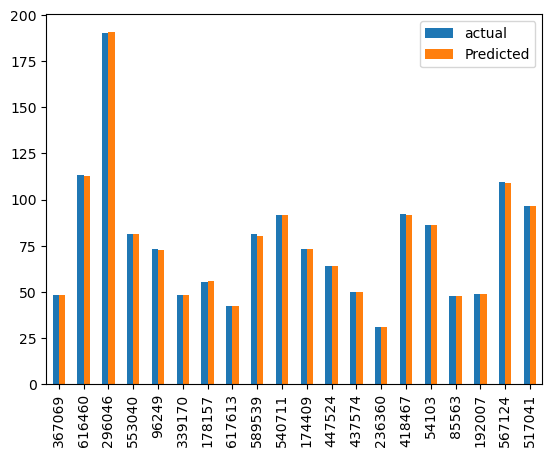

In [46]:
plt.show()